In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('store_data/train_df_save4.csv')
# test_df  = pd.read_csv('store_data/test_df_save4.csv')

train_df1 = pd.read_csv('train_aox2Jxw/train.csv')
# test_df1  = pd.read_csv('test_bqCt9Pv.csv')
# print(train_df1.shape, test_df1.shape)

train_df1 = train_df1[['UniqueID','DisbursalDate']]
# test_df1 = test_df1[['UniqueID','DisbursalDate']]

train_df = pd.merge(train_df, train_df1, on='UniqueID', how='left')
# test_df  = pd.merge(test_df, test_df1, on='UniqueID', how='left')

import gc
del train_df1#, test_df1
gc.collect()
# print(train_df.shape, test_df.shape)


train_df['cv_month'] = train_df.DisbursalDate.apply(lambda x: str(x).split('-')[1])
train_df.shape

(224607, 218)

In [4]:
dim_feat = [col for col in train_df.columns if col.startswith('tsne') or col.startswith('pca') \
            or col.startswith('svd')]

In [5]:
intersting_cols = ['manufacturer_id','Employment.Type','State_ID','Aadhar_flag','PAN_flag','VoterID_flag',
'Driving_flag','Passport_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',
'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
'month_of_birth','credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month',
'day_of_disbursal','month_of_disbursal','Bureau_desc','no_of_loans','no_of_acc','no_of_acc_overdue',
'diff_of_acc','negative_income','income_status','credit_history','loan_tenure','ltv_round_cat',
'no_of_inquiry','state1_max','state1_count','manufac1_max','manufac2_count']

most_imp = ['UniqueID','ltv', 'disbursed_amount', 'year_of_birth','no_of_acc_overdue','month_of_disbursal',
 'Employee_code_ID','Current_pincode_ID','State_ID', 'day_of_disbursal','day_of_birth',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS','no_of_inquiry','PRI.SANCTIONED.AMOUNT','credit_hist_year',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','emp_code1_sum','branch1_max','PRIMARY.INSTAL.AMT',
 'manufacturer_id','manufac1_max', 'cv_month']#,'cv_date']

shap_imp_cols = ['state1_mad','pincode2_mean','emp_code1_get_unique',
    'ltv_round_cat','bureau_score','emp_code1_sum','branch2_min', 'asset_cost', 'ltv',
    'manufac1_min','state1_mad','diff_of_acc','month_of_disbursal','day_of_disbursal',
    'no_of_acc_overdue','pincode2_mean','loan_default']
# train_df[shap_imp_cols].shape, test_df[shap_imp_cols].shape

# target = train_df.loan_default
train_df = train_df[list(set(intersting_cols + most_imp + shap_imp_cols + dim_feat))]
# test_df  = test_df[list(set(intersting_cols + most_imp + shap_imp_cols))]
train_df.shape#, test_df.shape, target.shape




(224607, 130)

In [14]:
def reduce_mem_usage_wo_print(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    print("="*30)
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory {:.2f} MB'.format(start_mem), "==>", end=" ")
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    # print(col, "== int8")
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    # print(col, "== int16")
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    # print(col, "== int32")
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    # print(col, "== int64")
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    # print(col, "== float16")
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    # print(col, "== float32")
                else:
                    df[col] = df[col].astype(np.float64)
                    # print(col, "== float64")
        #else: df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(' {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("="*30)
    return

In [8]:
import glob
int_inter_2way = glob.glob('store_data/new_feat/int_inter_2way/*')
print("no of round on interaction: ", len(int_inter_2way))

feat_test = pd.DataFrame()
for file in int_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
#     cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)

no of round on interaction:  4
store_data/new_feat/int_inter_2way/num_inter_2way_48.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 39.41 MB
Decreased by 71.2%
store_data/new_feat/int_inter_2way/num_inter_2way_16.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 38.98 MB
Decreased by 71.6%
store_data/new_feat/int_inter_2way/num_inter_2way_64.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 42.41 MB
Decreased by 69.1%
store_data/new_feat/int_inter_2way/num_inter_2way_32.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 39.84 MB
Decreased by 70.9%
final shape:  (224607, 320)


In [9]:
int_inter_3way = glob.glob('store_data/new_feat/int_inter_3way/*')
print("no of round on interaction: ", len(int_inter_3way))

# feat_test = pd.DataFrame()
for file in int_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
#     cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)

no of round on interaction:  17
store_data/new_feat/int_inter_3way/num_inter_3way_16.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 41.13 MB
Decreased by 70.0%
store_data/new_feat/int_inter_3way/num_inter_3way_112.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 41.13 MB
Decreased by 70.0%
store_data/new_feat/int_inter_3way/num_inter_3way_64.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 41.13 MB
Decreased by 70.0%
store_data/new_feat/int_inter_3way/num_inter_3way_144.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 46.27 MB
Decreased by 66.2%
store_data/new_feat/int_inter_3way/num_inter_3way_32.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 41.13 MB
Decreased by 70.0%
store_data/new_feat/int_inter_3way/num_inter_3way_208.csv
Memory usage of dataframe is 137.09 MB
Memory usage after optimization is: 41.56 MB
Decreased by 69.7%
store

In [10]:
feat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224607 entries, 0 to 224606
Columns: 1680 entries, pincode+pincode2_mean to branch2_min/disbursed_amt/pincode2_mean_post
dtypes: float16(1317), float32(306), int16(17), int32(30), int64(10)
memory usage: 876.5 MB


In [11]:
imp_ = pd.read_csv('store_data/cat_int_interaction_rf_importance.csv')
imp_.head()

feature  importance
0      assest+disbursed_amt    0.040958
1         ltv-pincode2_mean    0.016886
2         ltv+pincode2_mean    0.015206
3  pincode-emp_code1_unique    0.013667
4  pincode+emp_code1_unique    0.013558

In [12]:
use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)

138

In [15]:
feat_test = feat_test[list(use_cols)]
gc.collect()

2105

In [16]:
cat_inter_2way = glob.glob('store_data/new_feat/cat_inter_2way/*')
print("no of round on interaction: ", len(cat_inter_2way))

# feat_test = pd.DataFrame()
for file in cat_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)

no of round on interaction:  9
store_data/new_feat/cat_inter_2way/cat_inter_2way_5.csv
Memory 119.95 MB ==>  16.07 MB
Decreased by 86.6%
store_data/new_feat/cat_inter_2way/cat_inter_2way_0.csv
Memory 119.95 MB ==>  19.49 MB
Decreased by 83.7%
store_data/new_feat/cat_inter_2way/cat_inter_2way_6.csv
Memory 119.95 MB ==>  18.21 MB
Decreased by 84.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_7.csv
Memory 119.95 MB ==>  19.28 MB
Decreased by 83.9%
store_data/new_feat/cat_inter_2way/cat_inter_2way_4.csv
Memory 119.95 MB ==>  16.07 MB
Decreased by 86.6%
store_data/new_feat/cat_inter_2way/cat_inter_2way_2.csv
Memory 119.95 MB ==>  15.85 MB
Decreased by 86.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_1.csv
Memory 119.95 MB ==>  16.71 MB
Decreased by 86.1%
store_data/new_feat/cat_inter_2way/cat_inter_2way_8.csv
Memory 119.95 MB ==>  14.99 MB
Decreased by 87.5%
store_data/new_feat/cat_inter_2way/cat_inter_2way_3.csv
Memory 119.95 MB ==>  18.64 MB
Decreased by 84.5%
final shape:  (

In [18]:
cat_inter_3way = glob.glob('store_data/new_feat/cat_inter_3way_new/*')
print("no of round on interaction: ", len(cat_inter_3way))

# feat_test = pd.DataFrame()
for file in cat_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)

no of round on interaction:  102
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_7.csv
Memory 119.95 MB ==>  23.78 MB
Decreased by 80.2%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_38.csv
Memory 119.95 MB ==>  20.35 MB
Decreased by 83.0%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_96.csv
Memory 119.95 MB ==>  25.49 MB
Decreased by 78.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_67.csv
Memory 119.95 MB ==>  22.06 MB
Decreased by 81.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_42.csv
Memory 119.95 MB ==>  25.49 MB
Decreased by 78.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_39.csv
Memory 119.95 MB ==>  25.28 MB
Decreased by 78.9%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_16.csv
Memory 119.95 MB ==>  26.78 MB
Decreased by 77.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_46.csv
Memory 119.95 MB ==>  25.06 MB
Decreased by 79.1%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_78.csv
Memory 119.95 MB ==

Memory 119.95 MB ==>  23.99 MB
Decreased by 80.0%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_99.csv
Memory 119.95 MB ==>  24.85 MB
Decreased by 79.3%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_97.csv
Memory 119.95 MB ==>  22.28 MB
Decreased by 81.4%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_85.csv
Memory 119.95 MB ==>  23.13 MB
Decreased by 80.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_22.csv
Memory 119.95 MB ==>  23.13 MB
Decreased by 80.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_45.csv
Memory 119.95 MB ==>  23.99 MB
Decreased by 80.0%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_34.csv
Memory 119.95 MB ==>  22.06 MB
Decreased by 81.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_101.csv
Memory 119.95 MB ==>  22.06 MB
Decreased by 81.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_1.csv
Memory 119.95 MB ==>  24.85 MB
Decreased by 79.3%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_86.csv
M

store_data/new_feat/cat_inter_3way_new/cat_inter_3way_8.csv
Memory 119.95 MB ==>  18.85 MB
Decreased by 84.3%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_59.csv
Memory 119.95 MB ==>  24.42 MB
Decreased by 79.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_61.csv
Memory 119.95 MB ==>  21.63 MB
Decreased by 82.0%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_32.csv
Memory 119.95 MB ==>  25.70 MB
Decreased by 78.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_68.csv
Memory 119.95 MB ==>  22.06 MB
Decreased by 81.6%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_52.csv
Memory 119.95 MB ==>  25.28 MB
Decreased by 78.9%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_53.csv
Memory 119.95 MB ==>  22.06 MB
Decreased by 81.6%
final shape:  (224607, 7908)


In [19]:
use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)

768

In [20]:
feat_test = feat_test[list(use_cols)]
gc.collect()

695

In [21]:
feat_test.to_csv('store_data/intersting_inter_feature.csv', index=None)

In [22]:
reduce_mem_usage_wo_print(train_df)

Memory 224.48 MB ==>  56.76 MB
Decreased by 74.7%


In [23]:
train_df = pd.concat([train_df, feat_test], axis=1)
train_df.shape

(224607, 898)

In [25]:
import pandas as pd
import numpy as np
# train_df = pd.read_csv('store_data/train_df_save4.csv')
train_df_fake = pd.read_csv('train_aox2Jxw/train.csv')
train_df_fake = train_df_fake[['UniqueID','DisbursalDate']]
gc.collect()
# train_df = pd.merge(train_df, train_df1, on='UniqueID', how='left')


train_df_fake['cv_date'] = train_df_fake.DisbursalDate.apply(
                            lambda x: str(x).split('-')[0])
# train_df_fake['cv_month'] = train_df_fake.DisbursalDate.apply(lambda x: str(x).split('-')[1])
train_df_fake.shape

(233154, 3)

In [26]:
train_df = pd.merge(train_df, train_df_fake[['UniqueID','cv_date']], 
                    on='UniqueID', how='left')
train_df.shape

(224607, 899)

In [27]:
splits = 4
valid_splits = int(train_df.shape[0]/splits)
indexes = train_df[['cv_month','cv_date']].sort_values(
                by=['cv_month','cv_date'])

train_index = indexes[:-valid_splits].index
valid_index = indexes[-valid_splits:].index

len(train_index), len(valid_index)

(168456, 56151)

In [31]:
valid_df = train_df.iloc[valid_index]
train_df1 = train_df.iloc[train_index]
print(train_df1.shape, valid_df.shape)

del train_df, feat_test
gc.collect()

((168456, 899), (56151, 899))

In [34]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ankish/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmpjn7r625q
  JVM stdout: /tmp/tmpjn7r625q/h2o_ankish_started_from_python.out
  JVM stderr: /tmp/tmpjn7r625q/h2o_ankish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Asia/Kolkata
H2O data parsing timezone:  UTC
H2O cluster version:        3.18.0.2
H2O cluster version age:    1 year, 1 month and 12 days !!!
H2O cluster name:           H2O_from_python_ankish_hrg4z6
H2O cluster total nodes:    1
H2O cluster free memory:    2.590 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.7 final
--------------------------  ----------------------------------------

In [36]:
train = h2o.H2OFrame(train_df1)
test  = h2o.H2OFrame(valid_df)
train.shape, test.shape

/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


((168456, 899), (56151, 899))

In [37]:
# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

ignored_columns = ['UniqueID']
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y]  = test[y].asfactor()

# Run AutoML for 30 seconds
aml = H2OAutoML(max_models=25, seed=1337, max_runtime_secs=28800, nfolds=3)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


model_id auc logloss 
 
 
 StackedEnsemble_AllModels_0_AutoML_20190418_002021 0.656149 0.536199 
 StackedEnsemble_BestOfFamily_0_AutoML_20190418_002021 0.653466 0.537267 
 GBM_grid_0_AutoML_20190418_002021_model_1 0.650185 0.539527 
 GBM_grid_0_AutoML_20190418_002021_model_10 0.649268 0.538704 
 GBM_grid_0_AutoML_20190418_002021_model_5 0.648961 0.54116 
 GBM_grid_0_AutoML_20190418_002021_model_0 0.648662 0.539684 
 GBM_grid_0_AutoML_20190418_002021_model_6 0.648178 0.544465 
 GBM_grid_0_AutoML_20190418_002021_model_7 0.647224 0.544555 
 GLM_grid_0_AutoML_20190418_002021_model_0 0.647037 0.541455 
 GBM_grid_0_AutoML_20190418_002021_model_12 0.645679 0.55062 
 GBM_grid_0_AutoML_20190418_002021_model_2 0.645124 0.540536 
 GBM_grid_0_AutoML_20190418_002021_model_4 0.642066 0.542466 
 GBM_grid_0_AutoML_20190418_002021_model_8 0.639041 0.54988 
 GBM_grid_0_AutoML_20190418_002021_model_3 0.638206 0.544204 
 GBM_grid_0_AutoML_20190418_002021_model_13 0.62903 0.568016 
 GBM_grid_0_AutoML_20190418_002021_model_14 0.628511 0.56782 
 DeepLearning_0_AutoML_20190418_002021 0.62586 0.55109 
 DRF_0_AutoML_20190418_002021 0.620399 0.552103 
 XRT_0_AutoML_20190418_002021 0.619153 0.552049 
 GBM_grid_0_AutoML_20190418_002021_model_11 0.617606 0.557556

In [40]:
test_df  = pd.read_csv('store_data/test_df_save4.csv')
test_df1 = pd.read_csv('test_bqCt9Pv.csv')
test_df1 = test_df1[['UniqueID','DisbursalDate']]
test_df  = pd.merge(test_df, test_df1, on='UniqueID', how='left')

import gc
del test_df1
gc.collect()


test_df['cv_date']  = test_df.DisbursalDate.apply(lambda x: str(x).split('-')[0])
test_df['cv_month'] = test_df.DisbursalDate.apply(lambda x: str(x).split('-')[1])
print(test_df.shape)


dim_feat = [col for col in test_df.columns \
            if col.startswith('tsne') \
            or col.startswith('pca') \
            or col.startswith('svd')]


intersting_cols = ['manufacturer_id','Employment.Type','State_ID','Aadhar_flag','PAN_flag','VoterID_flag',
'Driving_flag','Passport_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',
'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
'month_of_birth','credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month',
'day_of_disbursal','month_of_disbursal','Bureau_desc','no_of_loans','no_of_acc','no_of_acc_overdue',
'diff_of_acc','negative_income','income_status','credit_history','loan_tenure','ltv_round_cat',
'no_of_inquiry','state1_max','state1_count','manufac1_max','manufac2_count']

most_imp = ['UniqueID','ltv', 'disbursed_amount', 'year_of_birth','no_of_acc_overdue','month_of_disbursal',
 'Employee_code_ID','Current_pincode_ID','State_ID', 'day_of_disbursal','day_of_birth',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS','no_of_inquiry','PRI.SANCTIONED.AMOUNT','credit_hist_year',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','emp_code1_sum','branch1_max','PRIMARY.INSTAL.AMT',
 'manufacturer_id','manufac1_max', 'cv_month','cv_date']

shap_imp_cols = ['state1_mad','pincode2_mean','emp_code1_get_unique',
    'ltv_round_cat','bureau_score','emp_code1_sum','branch2_min', 'asset_cost', 'ltv',
    'manufac1_min','state1_mad','diff_of_acc','month_of_disbursal','day_of_disbursal',
    'no_of_acc_overdue','pincode2_mean']#,'loan_default']

test_df = test_df[list(set(intersting_cols + most_imp + shap_imp_cols + dim_feat))]
print(test_df.shape)

gc.collect()

(112392, 218)
(112392, 130)


21

In [42]:
a = [1,2,3,4]
a, list(list(a))

([1, 2, 3, 4], [1, 2, 3, 4])

In [ ]:
def get_interaction_feature(collect_df, file_path, col_to_use, is_cat, 
                            reduce_memory, is_train, shape_to_use, train_test):
    """Collect All feature from the file-path
    Args:
      collect_df   : empty dataframe to store feature
      file_path    : filepath or list of files, where from collect these features
      col_to_use   : remove useless columns 
      is_cat       : is these categorical feature or integer(helpful for memory opt)
      reduce_memory: if need memory optimization
      is_train     : is this for train or test
      shape_to_use : if is_train: use [:shape_to_use] else: [shape_to_use:]
      train_test   : if need train_test both
    Returns:
      Required feature set
    """
    import glob
    
#     if len(file_path) < 10: print(idx)
#     elif len(file_path) < 40: print(idx)

    for idx,file in enumerate(file_path):
        print(idx)
        feature_df = pd.read_csv(file)
        if is_cat:
            feature_df = feature_df.astype('int')  
        # if don't need full data
        if not train_test:
            if is_train: 
                feature_df = feature_df.iloc[:shape_to_use,:]
            else:
                feature_df = feature_df.iloc[shape_to_use:,:]
        # reduce memory
        reduce_mem_usage_wo_print(feature_df)

        collect_df = pd.concat([collect_df, feature_df], axis=1)

        del feature_df
        gc.collect()
        
    collect_df = collect_df[list(col_to_use)]

    return collect_df

In [44]:
import glob
int_inter_2way = glob.glob('store_data/new_feat/int_inter_2way/*')
print("no of round on interaction: ", len(int_inter_2way))

feat_test = pd.DataFrame()
for file in int_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
#     cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[-test_df.shape[0]:,:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)

use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)

feat_test = feat_test[list(use_cols)]
gc.collect()


int_inter_3way = glob.glob('store_data/new_feat/int_inter_3way/*')
print("no of round on interaction: ", len(int_inter_3way))

# feat_test = pd.DataFrame()
for file in int_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
#     cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[-test_df.shape[0]:,:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)


use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)

feat_test = feat_test[list(use_cols)]
gc.collect()


no of round on interaction:  4
store_data/new_feat/int_inter_2way/num_inter_2way_48.csv
Memory 68.60 MB ==>  20.37 MB
Decreased by 70.3%
store_data/new_feat/int_inter_2way/num_inter_2way_16.csv
Memory 68.60 MB ==>  20.15 MB
Decreased by 70.6%
store_data/new_feat/int_inter_2way/num_inter_2way_64.csv
Memory 68.60 MB ==>  24.87 MB
Decreased by 63.7%
store_data/new_feat/int_inter_2way/num_inter_2way_32.csv
Memory 68.60 MB ==>  20.79 MB
Decreased by 69.7%
final shape:  (112392, 320)
no of round on interaction:  17
store_data/new_feat/int_inter_3way/num_inter_3way_16.csv
Memory 68.60 MB ==>  21.44 MB
Decreased by 68.7%
store_data/new_feat/int_inter_3way/num_inter_3way_112.csv
Memory 68.60 MB ==>  21.87 MB
Decreased by 68.1%
store_data/new_feat/int_inter_3way/num_inter_3way_64.csv
Memory 68.60 MB ==>  20.58 MB
Decreased by 70.0%
store_data/new_feat/int_inter_3way/num_inter_3way_144.csv
Memory 68.60 MB ==>  24.87 MB
Decreased by 63.7%
store_data/new_feat/int_inter_3way/num_inter_3way_32.csv
Me

7

In [45]:


cat_inter_2way = glob.glob('store_data/new_feat/cat_inter_2way/*')
print("no of round on interaction: ", len(cat_inter_2way))

# feat_test = pd.DataFrame()
for file in cat_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[-test_df.shape[0]:,:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)
use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)
feat_test = feat_test[list(use_cols)]


cat_inter_3way = glob.glob('store_data/new_feat/cat_inter_3way_new/*')
print("no of round on interaction: ", len(cat_inter_3way))

# feat_test = pd.DataFrame()
for file in cat_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')    
    cat_feature = cat_feature.iloc[-test_df.shape[0]:,:]
    reduce_mem_usage_wo_print(cat_feature)

    feat_test = pd.concat([feat_test, cat_feature], axis=1)

    del cat_feature
    gc.collect()
    
print("final shape: ", feat_test.shape)
use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)
feat_test = feat_test[list(use_cols)]

gc.collect()

no of round on interaction:  9
store_data/new_feat/cat_inter_2way/cat_inter_2way_5.csv
Memory 60.02 MB ==>  7.82 MB
Decreased by 87.0%
store_data/new_feat/cat_inter_2way/cat_inter_2way_0.csv
Memory 60.02 MB ==>  9.65 MB
Decreased by 83.9%
store_data/new_feat/cat_inter_2way/cat_inter_2way_6.csv
Memory 60.02 MB ==>  9.11 MB
Decreased by 84.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_7.csv
Memory 60.02 MB ==>  9.97 MB
Decreased by 83.4%
store_data/new_feat/cat_inter_2way/cat_inter_2way_4.csv
Memory 60.02 MB ==>  7.93 MB
Decreased by 86.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_2.csv
Memory 60.02 MB ==>  7.93 MB
Decreased by 86.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_1.csv
Memory 60.02 MB ==>  8.15 MB
Decreased by 86.4%
store_data/new_feat/cat_inter_2way/cat_inter_2way_8.csv
Memory 60.02 MB ==>  7.93 MB
Decreased by 86.8%
store_data/new_feat/cat_inter_2way/cat_inter_2way_3.csv
Memory 60.02 MB ==>  9.22 MB
Decreased by 84.6%
final shape:  (112392, 768)
no of

store_data/new_feat/cat_inter_3way_new/cat_inter_3way_72.csv
Memory 60.02 MB ==>  11.58 MB
Decreased by 80.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_50.csv
Memory 60.02 MB ==>  10.50 MB
Decreased by 82.5%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_70.csv
Memory 60.02 MB ==>  11.68 MB
Decreased by 80.5%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_73.csv
Memory 60.02 MB ==>  11.47 MB
Decreased by 80.9%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_11.csv
Memory 60.02 MB ==>  12.00 MB
Decreased by 80.0%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_29.csv
Memory 60.02 MB ==>  13.40 MB
Decreased by 77.7%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_74.csv
Memory 60.02 MB ==>  12.11 MB
Decreased by 79.8%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_20.csv
Memory 60.02 MB ==>  11.36 MB
Decreased by 81.1%
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_30.csv
Memory 60.02 MB ==>  10.83 MB
Decreased by 82.0%
store_data

7

In [47]:
use_cols = set(imp_.feature.values).intersection(set(feat_test.columns))
len(use_cols)
feat_test.shape

(112392, 768)

In [ ]:
feat_test.to_csv('store_data/intersting_inter_feature_test.csv', index=None)

reduce_mem_usage_wo_print(test_df)
test_df = pd.concat([test_df, feat_test], axis=1)
test_df.shape

Memory 112.33 MB ==>  28.94 MB
Decreased by 74.2%


In [ ]:
sub = pd.DataFrame()
sub['UniqueID'] = test_df.UniqueID

test = h2o.H2OFrame(test_df)
pred = aml1.predict(test)

pred = pred.as_data_frame()
sub['loan_default'] = pred.p1
# sub.columns = sub.columns
sub.to_csv('submission/gbm_wed1.csv', index=None)
sub.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id auc logloss 
 
 
 GBM_grid_0_AutoML_20190417_213607_model_0 0.644573 0.499749 
 XRT_0_AutoML_20190417_213607 0.643521 0.499639 
 GBM_grid_0_AutoML_20190417_213607_model_1 0.642036 0.500505 
 GLM_grid_0_AutoML_20190417_213607_model_0 0.639736 0.500754 
 DRF_0_AutoML_20190417_213607 0.635322 0.504474

In [6]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("store_data/train_df_save4.csv")
# test = h2o.import_file("store_data/test_df_save4.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=5, seed=1, max_runtime_secs=600, nfolds=0)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml1.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id auc logloss 
 
 
 GBM_grid_0_AutoML_20190417_214407_model_1 0.672536 0.496521 
 GBM_grid_0_AutoML_20190417_214407_model_0 0.671975 0.496897 
 GLM_grid_0_AutoML_20190417_214407_model_0 0.658491 0.503766 
 DRF_0_AutoML_20190417_214407 0.649343 0.504771 
 XRT_0_AutoML_20190417_214407 0.645618 0.506174

In [7]:
import pandas as pd
test_pd = pd.read_csv('store_data/test_df_save4.csv')#, usecols=['UniqueID'])
sub = pd.DataFrame()
sub['UniqueID'] = test_pd.UniqueID

test = h2o.H2OFrame(test_pd)
pred = aml1.predict(test)

pred = pred.as_data_frame()
sub['loan_default'] = pred.p1
# sub.columns = sub.columns
sub.to_csv('submission/gbm_wed1.csv', index=None)
sub.head()

/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


UniqueID  loan_default
0    655269      0.452935
1    723482      0.495612
2    758529      0.516179
3    763449      0.498542
4    708663      0.447370

In [8]:
sub.to_csv('submission/gbm_wed1.csv',index=None)


In [ ]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("store_data/train_df_save4.csv")
# test = h2o.import_file("store_data/test_df_save4.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=5, seed=1, max_runtime_secs=600, nfolds=0)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml1.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


In [4]:
# import pandas as pd
# tr = pd.read_csv('train_aox2Jxw/train.csv')


In [5]:
# train[y] = train[y].asfactor()
# train

UniqueID disbursed_amount asset_cost ltv branch_id supplier_id manufacturer_id Current_pincode_ID Date.of.Birth Employment.Type DisbursalDate State_ID Employee_code_ID MobileNo_Avl_Flag Aadhar_flag PAN_flag VoterID_flag Driving_flag Passport_flag PERFORM_CNS.SCORE PERFORM_CNS.SCORE.DESCRIPTION PRI.NO.OF.ACCTS PRI.ACTIVE.ACCTS PRI.OVERDUE.ACCTS PRI.CURRENT.BALANCE PRI.SANCTIONED.AMOUNT PRI.DISBURSED.AMOUNT SEC.NO.OF.ACCTS SEC.ACTIVE.ACCTS SEC.OVERDUE.ACCTS SEC.CURRENT.BALANCE SEC.SANCTIONED.AMOUNT SEC.DISBURSED.AMOUNT PRIMARY.INSTAL.AMT SEC.INSTAL.AMT NEW.ACCTS.IN.LAST.SIX.MONTHS DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS AVERAGE.ACCT.AGE CREDIT.HISTORY.LENGTH NO.OF_INQUIRIES loan_default 
 
 
 420825 50578 58400 89.55 67 22807 45 1441 1984-01-01 00:00:00 Salaried 03-08-18 6 1998 1 1 0 0 0 0 0 No Bureau History Available 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0yrs 0mon 0yrs 0mon 0 0 
 537409 47145 65550 73.23 67 22807 45 1502 Self employed 26-09-18 6 1998 1 1 0 0 0 0 598 I-Medium Risk 1 1 1 27600 50200 50200 0 0 0 0 0 0 1991 0 0 1 1yrs 11mon 1yrs 11mon 0 1 
 417566 53278 61360 89.63 67 22807 45 1497 Self employed 01-08-18 6 1998 1 1 0 0 0 0 0 No Bureau History Available 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0yrs 0mon 0yrs 0mon 0 0 
 624493 57513 66113 88.48 67 22807 45 1501 Self employed 26-10-18 6 1998 1 1 0 0 0 0 305 L-Very High Risk 3 0 0 0 0 0 0 0 0 0 0 0 31 0 0 0 0yrs 8mon 1yrs 3mon 1 1 
 539055 52378 60300 88.39 67 22807 45 1495 1977-09-12 00:00:00 Self employed 26-09-18 6 1998 1 1 0 0 0 0 0 No Bureau History Available 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0yrs 0mon 0yrs 0mon 1 1 
 518279 54513 61900 89.66 67 22807 45 1501 1990-08-09 00:00:00 Self employed 19-09-18 6 1998 1 1 0 0 0 0 825 A-Very Low Risk 2 0 0 0 0 0 0 0 0 0 0 0 1347 0 0 0 1yrs 9mon 2yrs 0mon 0 0 
 529269 46349 61500 76.42 67 22807 45 1502 1988-01-06 00:00:00 Salaried 23-09-18 6 1998 1 1 0 0 0 0 0 No Bureau History Available 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0yrs 0mon 0yrs 0mon 0 0 
 510278 43894 61900 71.89 67 22807 45 1501 1989-04-10 00:00:00 Salaried 16-09-18 6 1998 1 1 0 0 0 0 17 Not Scored: Not Enough Info available on the customer 1 1 0 72879 74500 74500 0 0 0 0 0 0 0 0 0 0 0yrs 2mon 0yrs 2mon 0 0 
 490213 53713 61973 89.56 67 22807 45 1497 Self employed 05-09-18 6 1998 1 1 0 0 0 0 718 D-Very Low Risk 1 1 0 -41 365384 365384 0 0 0 0 0 0 0 0 0 0 4yrs 8mon 4yrs 8mon 1 0 
 510980 52603 61300 86.95 67 22807 45 1492 2068-01-06 00:00:00 Salaried 16-09-18 6 1998 1 0 0 1 0 0 818 A-Very Low Risk 1 0 0 0 0 0 0 0 0 0 0 0 2608 0 0 0 1yrs 7mon 1yrs 7mon 0 0

In [6]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train_aox2Jxw/train.csv")
test = h2o.import_file("test_bqCt9Pv.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=2, seed=1, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id auc logloss 
 
 
 StackedEnsemble_BestOfFamily_0_AutoML_20190417_121630 0.647097 0.500026 
 StackedEnsemble_AllModels_0_AutoML_20190417_121630 0.647097 0.500026 
 XRT_0_AutoML_20190417_121630 0.640294 0.501751 
 DRF_0_AutoML_20190417_121630 0.634744 0.505718

In [2]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train_aox2Jxw/train.csv")
# test = h2o.import_file("test_bqCt9Pv.csv")

train = train.drop('UniqueID', axis=1)
# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()



Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# del train
import gc
gc.collect()

62

In [4]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=20, seed=1337, max_runtime_secs=14000, nfolds=4)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb1 = aml1.leaderboard
lb1.head(rows=lb1.nrows)  # Print all rows instead of default (10 rows)


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id auc logloss 
 
 
 StackedEnsemble_AllModels_0_AutoML_20190417_123025 0.659059 0.495797 
 StackedEnsemble_BestOfFamily_0_AutoML_20190417_123025 0.658088 0.496051 
 GBM_grid_0_AutoML_20190417_123025_model_12 0.656414 0.501299 
 GBM_grid_0_AutoML_20190417_123025_model_11 0.655463 0.502426 
 GBM_grid_0_AutoML_20190417_123025_model_15 0.653439 0.49761 
 GBM_grid_0_AutoML_20190417_123025_model_7 0.651671 0.503661 
 GBM_grid_0_AutoML_20190417_123025_model_10 0.64296 0.501308 
 GBM_grid_0_AutoML_20190417_123025_model_6 0.640216 0.50635 
 GBM_grid_0_AutoML_20190417_123025_model_0 0.640005 0.502206 
 GLM_grid_0_AutoML_20190417_123025_model_0 0.638835 0.502693 
 XRT_0_AutoML_20190417_123025 0.637457 0.502759 
 GBM_grid_0_AutoML_20190417_123025_model_1 0.637024 0.503663 
 DRF_0_AutoML_20190417_123025 0.635191 0.505393 
 GBM_grid_0_AutoML_20190417_123025_model_2 0.633548 0.50564 
 GBM_grid_0_AutoML_20190417_123025_model_4 0.633223 0.506645 
 DeepLearning_0_AutoML_20190417_123025 0.630434 0.50719 
 GBM_grid_0_AutoML_20190417_123025_model_9 0.628784 0.508655 
 GBM_grid_0_AutoML_20190417_123025_model_3 0.62849 0.509623 
 GBM_grid_0_AutoML_20190417_123025_model_13 0.625377 0.515664 
 DeepLearning_grid_0_AutoML_20190417_123025_model_0 0.616908 0.514815 
 GBM_grid_0_AutoML_20190417_123025_model_8 0.603776 0.548215 
 GBM_grid_0_AutoML_20190417_123025_model_5 0.584656 0.626125

In [9]:
test = h2o.import_file("test_bqCt9Pv.csv")
pred = aml1.predict(test)
pred.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'DisbursalDate' has levels not trained on: [03-11-18, 05-11-18, 06-11-18, 07-11-18, 08-11-18, 09-11-18, 10-11-18, 11-11-18, 12-11-18, 13-11-18, 14-11-18, 15-11-18, 16-11-18, 17-11-18, 18-11-18, 19-11-18, 20-11-18, 21-11-18, 22-11-18, 23-11-18, 24-11-18, 25-11-18, 26-11-18, 27-11-18, 28-11-18, 29-11-18, 30-11-18]
  warnings.warn(w)
/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'AVERAGE.ACCT.AGE' has levels not trained on: [12yrs 8mon, 13yrs 9mon, 14yrs 4mon, 14yrs 9mon, 15yrs 1mon, 16yrs 2mon, 16yrs 9mon, 25yrs 10mon]
  warnings.warn(w)
/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'CREDIT.HISTORY.LENGTH' has levels not trained on: [18yrs 3mon, 18yrs 9mon, 21yrs 0mon, 21yrs 10mon, 21yrs 7mon, 22yrs 5mon, 22yrs 8mon, 23yrs 5mon, 23yrs 8mon, 25yrs 10mon, 

predict p0 p1 
 
 
 1 0.751799 0.248201 
 1 0.767391 0.232609 
 1 0.782985 0.217015 
 1 0.76599 0.23401 
 1 0.715099 0.284901 
 1 0.657926 0.342074 
 1 0.635599 0.364401 
 1 0.770076 0.229924 
 1 0.735645 0.264355 
 1 0.733067 0.266933

In [25]:
h2o.export_file(pred, 'submission/stack.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [28]:
import pandas as pd

pred1 = pred.as_data_frame()
pred1.iloc[:5]

predict        p0        p1
0        1  0.751799  0.248201
1        1  0.767391  0.232609
2        1  0.782985  0.217015
3        1  0.765990  0.234010
4        1  0.715099  0.284901

In [37]:
test1 = pd.read_csv('test_bqCt9Pv.csv')
sub.shape, test1.shape

((112392, 2), (112392, 40))

In [47]:
sub1 = pd.DataFrame()
sub1['id'] = test1.UniqueID
sub1['target'] = pred1.p1
sub1.columns = sub.columns
sub1.head()

UniqueID  loan_default
0    655269      0.248201
1    723482      0.232609
2    758529      0.217015
3    763449      0.234010
4    708663      0.284901

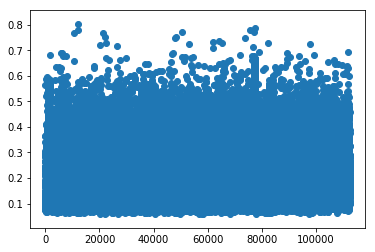

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(np.arange(sub1.shape[0]),sub1.loan_default)

In [44]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 2 columns):
UniqueID        112392 non-null int64
loan_default    112392 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [ ]:
sub.loan_default = pred1.p1

In [48]:
sub1.to_csv('submission/stack_wed.csv', index=None)

In [42]:
sub.shape, sub1.shape

((112392, 2), (112392, 2))

In [ ]:
    y_test_pred = fit_model.predict_proba(test_df)[:,1]


    sub_df = pd.DataFrame({"ID_code":test_ids})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)

In [ ]:
# # The leader model is stored here
# aml.leader

# # If you need to generate predictions on a test set, you can make
# # predictions directly on the `"H2OAutoML"` object, or on the leader
# # model object directly

# preds = aml.predict(test)

# # or:
# preds = aml.leader.predict(test)

In [ ]:
# import h2o
# from h2o.automl import H2OAutoML

# h2o.init()

# # Import a sample binary outcome train/test set into H2O
# train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
# test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# # Identify predictors and response
# x = train.columns
# y = "response"
# x.remove(y)

# # For binary classification, response should be a factor
# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# aml = H2OAutoML(max_models=20, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# # View the AutoML Leaderboard
# lb = aml.leaderboard
# lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# # model_id                                                  auc    logloss    mean_per_class_error      rmse       mse
# # ---------------------------------------------------  --------  ---------  ----------------------  --------  --------
# # StackedEnsemble_AllModels_AutoML_20181212_105540     0.789801   0.551109                0.333174  0.43211   0.186719
# # StackedEnsemble_BestOfFamily_AutoML_20181212_105540  0.788425   0.552145                0.323192  0.432625  0.187165
# # XGBoost_1_AutoML_20181212_105540                     0.784651   0.55753                 0.325471  0.434949  0.189181
# # XGBoost_grid_1_AutoML_20181212_105540_model_4        0.783523   0.557854                0.318819  0.435249  0.189441
# # XGBoost_grid_1_AutoML_20181212_105540_model_3        0.783004   0.559613                0.325081  0.435708  0.189841
# # XGBoost_2_AutoML_20181212_105540                     0.78136    0.55888                 0.347074  0.435907  0.190015
# # XGBoost_3_AutoML_20181212_105540                     0.780847   0.559589                0.330739  0.43613   0.190209
# # GBM_5_AutoML_20181212_105540                         0.780837   0.559903                0.340848  0.436191  0.190263
# # GBM_2_AutoML_20181212_105540                         0.780036   0.559806                0.339926  0.436415  0.190458
# # GBM_1_AutoML_20181212_105540                         0.779827   0.560857                0.335096  0.436616  0.190633
# # GBM_3_AutoML_20181212_105540                         0.778669   0.56179                 0.325538  0.437189  0.191134
# # XGBoost_grid_1_AutoML_20181212_105540_model_2        0.774411   0.575017                0.322811  0.4427    0.195984
# # GBM_4_AutoML_20181212_105540                         0.771426   0.569712                0.33742   0.44107   0.194543
# # GBM_grid_1_AutoML_20181212_105540_model_1            0.769752   0.572583                0.344331  0.442452  0.195764
# # GBM_grid_1_AutoML_20181212_105540_model_2            0.754366   0.918567                0.355855  0.496638  0.246649
# # DRF_1_AutoML_20181212_105540                         0.742892   0.595883                0.355403  0.452774  0.205004
# # XRT_1_AutoML_20181212_105540                         0.742091   0.599346                0.356583  0.453117  0.205315
# # DeepLearning_grid_1_AutoML_20181212_105540_model_2   0.741795   0.601497                0.368291  0.454904  0.206937
# # XGBoost_grid_1_AutoML_20181212_105540_model_1        0.693554   0.620702                0.40588   0.465791  0.216961
# # DeepLearning_1_AutoML_20181212_105540                0.69137    0.637954                0.409351  0.47178   0.222576
# # DeepLearning_grid_1_AutoML_20181212_105540_model_1   0.690084   0.661794                0.418469  0.476635  0.227181
# # GLM_grid_1_AutoML_20181212_105540_model_1            0.682648   0.63852                 0.397234  0.472683  0.223429
# #
# # [22 rows x 6 columns]


# # The leader model is stored here
# aml.leader

# # If you need to generate predictions on a test set, you can make
# # predictions directly on the `"H2OAutoML"` object, or on the leader
# # model object directly

# preds = aml.predict(test)

# # or:
# preds = aml.leader.predict(test)